### 1. Sampling and Empirical Distributions

In [88]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [89]:
top1 = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/top_movies_2017.csv')
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')
top.set_format(make_array(3, 4), NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [90]:
top.take(make_array(3, 18, 100))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
18,The Lion King,Buena Vista,"422,783,777","792,511,700",1994
100,The Hunger Games,Lionsgate,"408,010,692","452,174,400",2012


In [91]:
top.where('Title', are.containing('Harry Potter'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,"381,011,219","426,630,300",2011
131,Harry Potter and the Goblet of Fire,Warner Brothers,"290,013,036","401,608,200",2005
133,Harry Potter and the Chamber of Secrets,Warner Brothers,"261,988,482","399,302,200",2002
154,Harry Potter and the Order of the Phoenix,Warner Brothers,"292,004,738","377,314,200",2007
175,Harry Potter and the Half-Blood Prince,Warner Brothers,"301,959,197","359,788,300",2009
177,Harry Potter and the Prisoner of Azkaban,Warner Brothers,"249,541,069","357,233,500",2004


In [116]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, top.num_rows, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
17,Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","802,874,300",1999
27,Grease,Paramount,"188,755,690","684,256,200",1978
37,Spider-Man,Sony,"403,706,375","617,719,400",2002
47,Pirates of the Caribbean: Dead Man's Chest,Buena Vista,"423,315,812","574,546,200",2006
57,Cinderella (1950),Disney,"93,141,149","536,079,700",1950
67,The Sixth Sense,Buena Vista,"293,506,292","511,878,400",1999
77,Lawrence of Arabia,Columbia,"44,824,144","492,359,800",1962
87,"It's a Mad, Mad, Mad, Mad World",MGM,"46,332,858","478,952,400",1963
97,Ghost,Paramount,"217,631,306","457,525,800",1990


### 2. Empirical Distributions

In [1]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


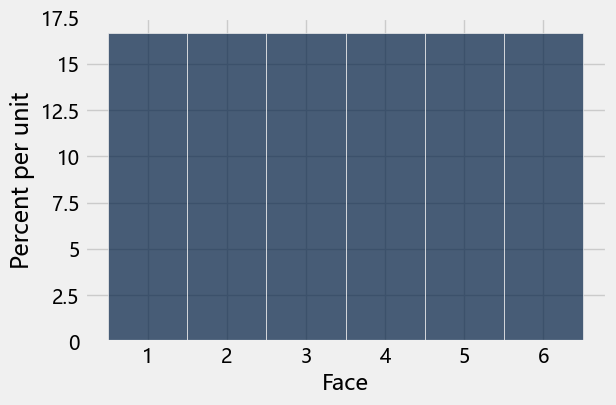

In [3]:
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

In [4]:
die.sample(10)

Face
5
3
6
5
6
4
4
6
1
5


In [5]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)

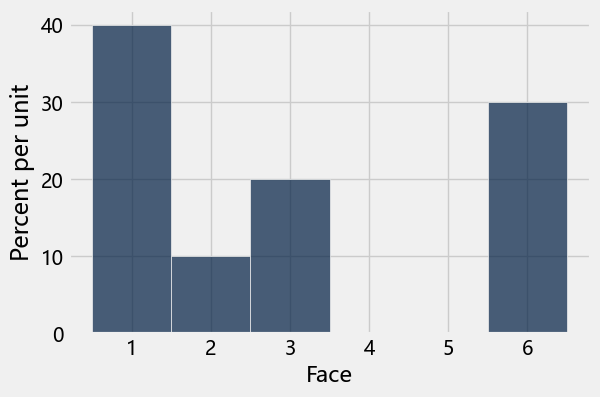

In [12]:
empirical_hist_die(10)

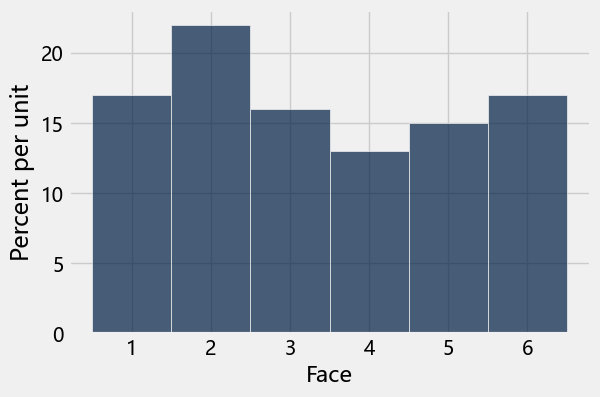

In [17]:
empirical_hist_die(100)

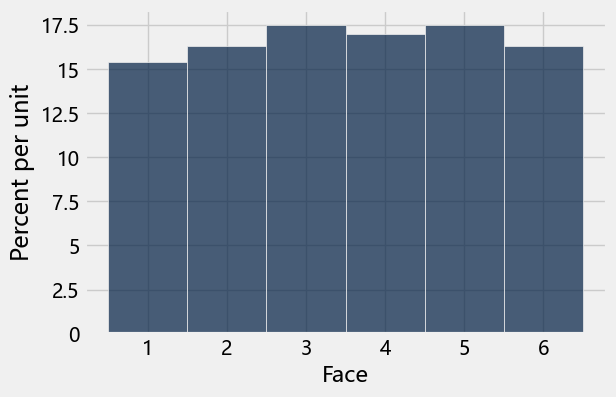

In [21]:
empirical_hist_die(1000)

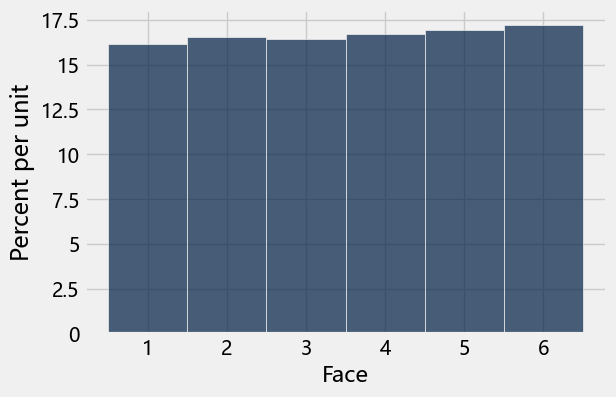

In [25]:
empirical_hist_die(10000)

### 3. Sampling from a Population

In [26]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [27]:
united = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [28]:
united.column('Delay').min()

-16

In [29]:
united.column('Delay').max()

580

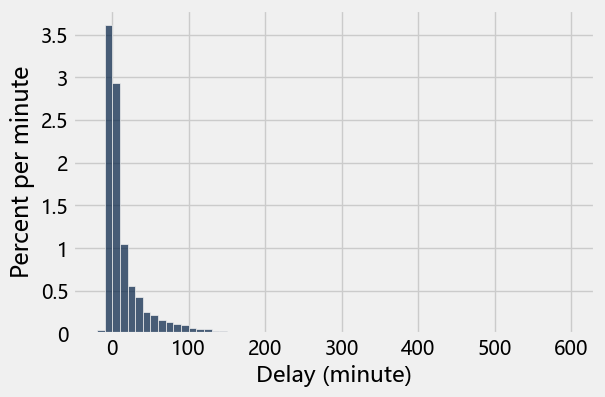

In [30]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')

In [33]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

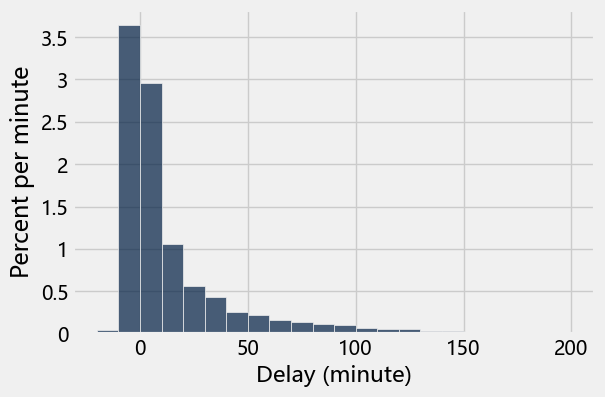

In [34]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')

In [35]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

In [72]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')

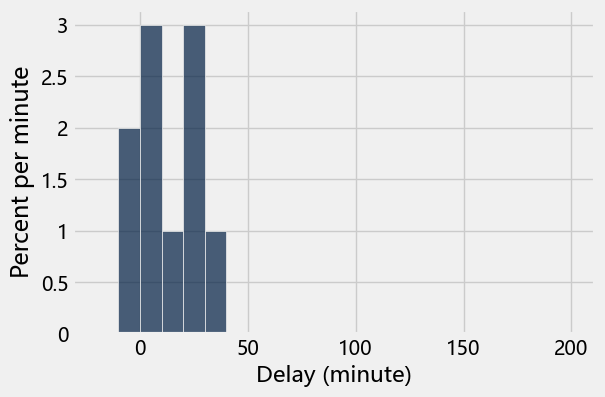

In [73]:
empirical_hist_delay(10)

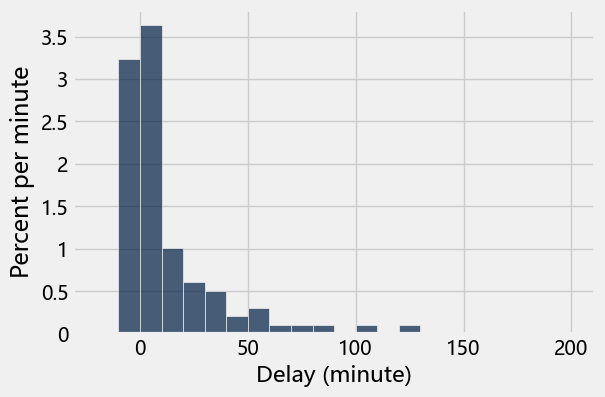

In [75]:
empirical_hist_delay(100)

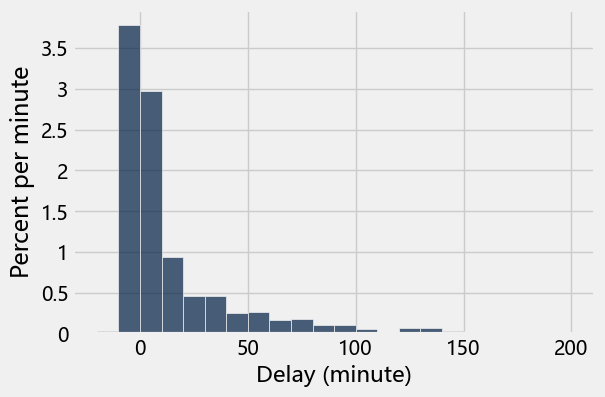

In [87]:
empirical_hist_delay(1000)

### 4. Empirical Distribution of a Statistic

In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
united = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/united_summer2015.csv')

Text(0.5, 1.0, 'Population')

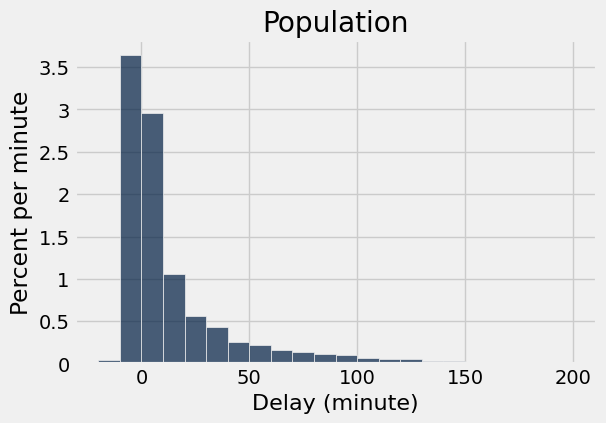

In [3]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Population')

Text(0.5, 1.0, 'Sample of Size 1000')

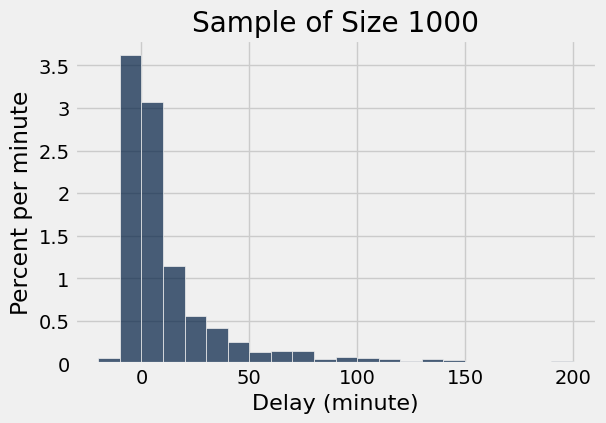

In [7]:
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 1000')

In [8]:
np.median(united.column('Delay'))

2.0

In [9]:
united.where('Delay', are.below_or_equal_to(2)).num_rows/united.num_rows

0.5018444846292948

In [10]:
united.where('Delay', are.equal_to(2)).num_rows

480

In [16]:
np.median(sample_1000.column('Delay'))

3.0

In [19]:
np.median(united.sample(1000).column('Delay'))

2.0

In [20]:
def random_sample_median(n):
    return np.median(united.sample(n).column('Delay'))

In [21]:
median = make_array()
for i in np.arange(5000):
    median = np.append(median, random_sample_median(1000))

In [22]:
simulate_median = Table().with_column('Sample Median', median)
simulate_median

Sample Median
3
3
3
2.5
2
2
2
2
2
2


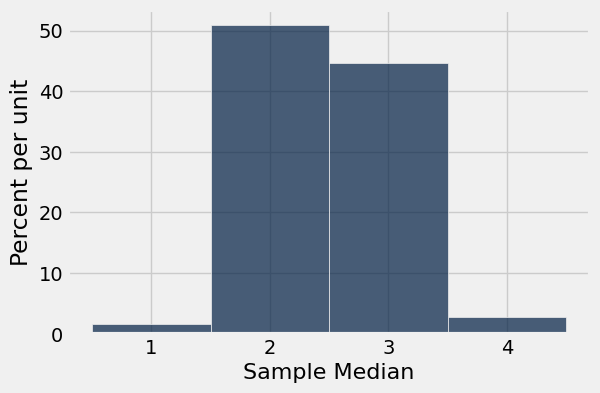

In [23]:
simulate_median.hist(bins = np.arange(0.5, 5, 1))

### 5. Random Sampling in Python

In [1]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
faces = np.arange(1, 7)
die = Table().with_column('Face', faces)
die

Face
1
2
3
4
5
6


In [3]:
die.sample(10)

Face
3
5
5
4
6
4
3
6
6
6


In [4]:
actors = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


In [5]:
actors.sample(5, with_replacement = False)

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Helena Bonham Carter,2822,36,78.4,Harry Potter / Deathly Hallows (P2),381
Ian McKellen,3150.4,31,101.6,Return of the King,377.8
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Cate Blanchett,2802.6,39,71.9,Return of the King,377.8
Mark Wahlberg,2549.8,36,70.8,Transformers 4,245.4


In [6]:
faces

array([1, 2, 3, 4, 5, 6])

In [7]:
np.random.choice(faces, 7)

array([5, 2, 4, 4, 2, 2, 2])

In [8]:
actor_name = actors.column('Actor')

In [9]:
np.random.choice(actor_name, 5, replace = False)

array(['Woody Harrelson', 'Julia Roberts', 'Don Cheadle', 'Will Smith',
       'Anne Hathaway'],
      dtype='<U22')

In [14]:
species_proportions = [0.25, 0.5, 0.25]
sample_size = 300
sample_distribution = sample_proportions(sample_size, species_proportions)
sample_distribution

array([ 0.26      ,  0.50666667,  0.23333333])

In [15]:
sum(sample_distribution)

1.0

In [18]:
sample_distribution.item(1)

0.5066666666666667